In [2]:
!module load nvidia-compilers/23.9 cuda/12.2.0 cudnn/8.9.7.29-cuda  openmpi/4.1.5-cuda nccl/2.18.5-1-cuda cmake

/gpfslocalsup/pub/anaconda-py3/2021.05/envs/python-3.10.4/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [2]:
%pylab inline

import jax
import numpy as np
import jax_cosmo as jc
from math import prod

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
N = 256
mesh_shape = (N, N, N)
pdims=(2,2)

In [25]:
init_field_slices = []
field_slices = []


for i in range(pdims[0]):
    row_init_field = []
    row_field = []
    for j in range(pdims[1]):


        slice_index = i + j * pdims[0]

        row_init_field.append(np.load(f'../simulation_init_field_float16_{slice_index}.npy'))
        row_field.append(np.load(f'../simulation_field_float16_{slice_index}.npy'))


    init_field_slices.append(np.vstack(row_init_field))
    field_slices.append(np.vstack(row_field))


init_field = np.hstack(init_field_slices)
field = np.hstack(field_slices)




/gpfsdswork/projects/rech/tkc/commun/jaxDecomp/venv/v100/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


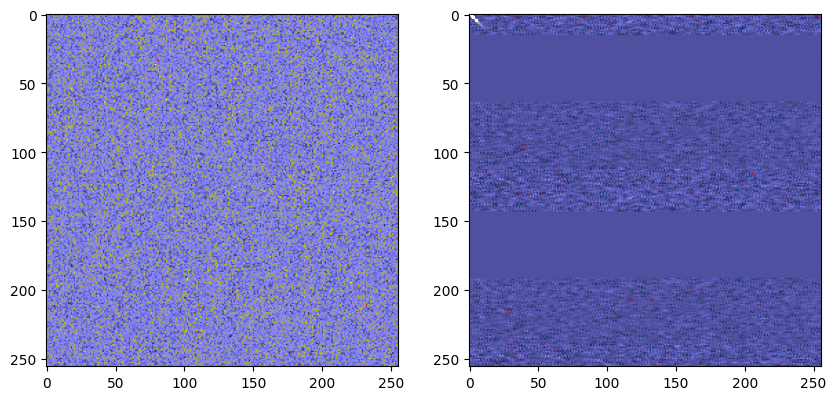

In [26]:
figure(figsize=[10,5])
subplot(121)
imshow(init_field.sum(axis=0),cmap='gist_stern')
subplot(122)
imshow(field.sum(axis=0),cmap='gist_stern')


In [1]:
figure(figsize=[10,5])
subplot(121)
imshow(cic_paint(jnp.zeros(mesh_shape), res[0]).sum(axis=0),cmap='gist_stern')
subplot(122)
imshow(cic_paint(jnp.zeros(mesh_shape), res[1]).sum(axis=0),cmap='gist_stern')

NameError: name 'figure' is not defined